# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.isnull().values.any()

False

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Standardized the Input Variables

In [6]:
x = (data.loc[:, data.columns != 'Class'])
y = (data.loc[:, data.columns == 'Class'])

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x, y = rus.fit_resample(x, y)

In [9]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76475.0,-1.004046,1.053270,1.093808,-0.591014,0.516087,-0.415980,0.476134,0.305124,-0.844857,...,0.031343,-0.198036,-0.798085,-0.105299,-0.624258,-0.033219,-0.054535,-0.066880,0.004584,14.95
1,88181.0,-0.422831,0.239428,1.512375,-1.075881,-0.809157,-0.089498,0.838381,-0.463100,-0.698558,...,-0.469495,-0.568205,-0.860065,-0.002557,-0.079295,-0.594139,-0.644110,-0.140223,-0.106076,123.75
2,79893.0,-0.138855,-0.976921,0.883736,-3.393556,1.142488,3.914621,-1.119220,0.869570,-1.539373,...,-0.153597,-0.228985,-0.147826,-0.093426,0.977747,-0.269920,-0.413884,0.018587,-0.078387,20.00
3,159214.0,0.256621,0.223809,0.975735,-0.220988,-0.270464,0.568080,-0.394989,-0.637367,0.416232,...,-0.084076,1.080174,0.763228,-0.220929,0.824970,0.789579,-0.064883,0.223809,0.257101,39.95
4,75718.0,-1.438013,1.298178,0.909734,-0.495798,0.255640,-0.766527,0.449792,0.361424,-0.492433,...,-0.160198,-0.141175,-0.479615,0.105791,0.038759,-0.299486,-0.087374,-0.033205,0.108152,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [10]:
from sklearn.preprocessing import StandardScaler

x=x.copy()

# numerical features
num_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x[[i]])
    
    # transform the training data column
    x[i] = scale.transform(x[[i]])

In [11]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.218716,0.268208,-0.232253,0.733983,-0.900510,0.491087,0.128231,0.548802,0.007153,0.193375,...,-0.110119,-0.203844,-0.681970,-0.078514,-1.024803,-0.115907,-0.145827,-0.135278,-0.064217,-0.362198
1,0.026866,0.374068,-0.456173,0.801060,-1.053334,0.177746,0.309771,0.610344,-0.149532,0.256693,...,-0.566904,-0.335550,-0.734705,0.010023,-0.045882,-0.957784,-1.383713,-0.206601,-0.307594,0.101744
2,-0.147009,0.425791,-0.790838,0.700319,-1.783834,0.639193,2.536260,0.277769,0.122276,-0.107207,...,-0.278791,-0.214856,-0.128707,-0.068282,1.852888,-0.471168,-0.900325,-0.052165,-0.246696,-0.340664
3,1.517072,0.497821,-0.460470,0.715062,-0.783883,0.305115,0.675417,0.400808,-0.185075,0.739168,...,-0.215386,0.250940,0.646450,-0.178157,1.578453,1.119018,-0.167554,0.147405,0.491150,-0.255594
4,-0.234597,0.189166,-0.164869,0.704485,-0.870500,0.429507,-0.066690,0.544327,0.018636,0.345902,...,-0.284812,-0.183613,-0.411004,0.103391,0.166178,-0.515543,-0.214778,-0.102530,0.163562,-0.404669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.725353,0.099943,-0.212338,-0.165377,-0.162877,-0.001317,-0.758398,0.317926,0.087122,-0.334672,...,1.004053,0.143635,-0.274509,0.563237,-0.433148,0.740681,1.624007,0.214379,0.251130,1.237080
980,1.729654,0.702167,-0.167290,-0.243246,-0.269235,0.473707,-0.378083,0.227830,-0.004391,0.071094,...,0.067542,-0.001521,0.021091,-0.113277,-0.049034,0.717225,1.521277,0.308194,0.336175,-0.422707
981,1.729737,0.327931,-0.212142,0.203946,-0.566626,0.104123,0.357676,0.088255,0.191741,0.276735,...,0.087452,0.134115,0.706757,0.176770,0.154163,-1.176246,0.957830,0.304261,0.353164,-0.093811
982,1.742640,-0.116062,-0.360855,-0.306624,-0.141508,0.170307,-1.277222,0.092797,0.160857,-0.147440,...,0.140627,0.074145,-0.231984,-0.380819,-0.233353,-0.558591,1.241289,0.790264,-0.632267,0.618775


### Split Data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [13]:
x_test.shape

(296, 30)

In [14]:
x_val = x_train[:196]
x_train = x_train[196:]

In [15]:
y_val = y_train[:196]
y_train = y_train[196:]

In [16]:
x_train.shape

(492, 30)

In [17]:
y_train.shape

(492, 1)

### Model

In [130]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(30,)))
    model.add(layers.Dense(8, activation='relu', ))
    model.add(layers.Dense(6, activation='relu', ))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [143]:
model=build_model()
history= model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/30
31/31 [==============================] - 0s 14ms/step - loss: 0.6552 - accuracy: 0.5833 - val_loss: 0.6324 - val_accuracy: 0.6378
Epoch 2/30
31/31 [==============================] - 0s 5ms/step - loss: 0.5905 - accuracy: 0.7398 - val_loss: 0.5670 - val_accuracy: 0.7806
Epoch 3/30
31/31 [==============================] - 0s 4ms/step - loss: 0.5209 - accuracy: 0.8476 - val_loss: 0.4916 - val_accuracy: 0.8827
Epoch 4/30
31/31 [==============================] - 0s 5ms/step - loss: 0.4544 - accuracy: 0.8821 - val_loss: 0.4138 - val_accuracy: 0.9133
Epoch 5/30
31/31 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8902 - val_loss: 0.3392 - val_accuracy: 0.9286
Epoch 6/30
31/31 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.9004 - val_loss: 0.2778 - val_accuracy: 0.9286
Epoch 7/30
31/31 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.9065 - val_loss: 0.2391 - val_accuracy: 0.9286
Epoch 8/30
31/31 [=

In [144]:
train_loss= history.history['loss']
val_loss= history.history['val_loss']

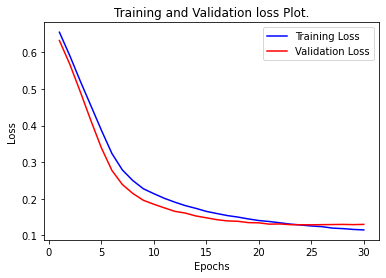

In [145]:
epochs= range(1,len(train_loss)+1)
plt.plot(epochs, train_loss, 'b', label='Training Loss' )
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss Plot.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

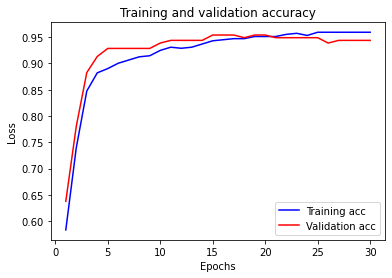

In [146]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9257


[0.1997373402118683, 0.9256756901741028]

In [151]:
pred= model.predict(x_test)

In [153]:
pred.reshape(-1)

array([0.02597421, 0.99999917, 0.03297463, 0.9999984 , 0.99614644,
       0.02823481, 0.10288265, 0.99931103, 0.9999982 , 0.9999999 ,
       0.0364486 , 0.99937755, 0.0776661 , 0.04790491, 0.9731218 ,
       0.04498518, 0.99981487, 0.99936956, 0.0280824 , 0.10154834,
       0.02515572, 1.        , 0.0957551 , 0.9028281 , 0.03123578,
       0.0356023 , 0.48404917, 0.73382986, 0.99571633, 0.9999979 ,
       0.01153454, 1.        , 1.        , 1.        , 0.01873785,
       0.02427083, 0.05623806, 0.04817858, 0.05791825, 0.11287725,
       0.17723015, 1.        , 1.        , 0.07897198, 1.        ,
       0.9999998 , 0.01855201, 0.04827979, 0.24470615, 0.07955644,
       0.27033234, 0.5626173 , 0.99978817, 1.        , 0.01692006,
       0.09274527, 1.        , 0.99999964, 0.04836091, 0.02453589,
       0.02593938, 0.9994452 , 0.13821259, 1.        , 1.        ,
       0.999938  , 0.02038482, 1.        , 0.9996915 , 0.9998703 ,
       0.9998519 , 0.02409872, 0.9999933 , 0.99425334, 0.99999

In [154]:
pred=np.round(pred)
pred

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [156]:
evaluate=pd.DataFrame({'Actual': y_test['Class']})

In [157]:
evaluate['prediction']= pred

In [158]:
evaluate

,Actual,prediction
231,0,0.0
522,1,1.0
27,0,0.0
630,1,1.0
930,1,1.0
...,...,...
385,0,0.0
941,1,1.0
922,1,1.0
909,1,1.0


In [159]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       147
           1       0.96      0.89      0.92       149

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

